In [1]:
import pandas as pd
from my_utils import *
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
#그래프를 그릴 때 한글로 설정해줌 # 윈도우-Fonts
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) 

In [433]:
conn = connect_mysql()
query = 'select * from lol_datas'
df = pd.read_csv('lol_datas.csv')
conn.close()

In [434]:
df.columns

Index(['gameId', 'gameDuration', 'gameVersion', 'summonerName',
       'summonerLevel', 'participantId', 'championName', 'champExperience',
       'teamPosition', 'teamId', 'win', 'kills', 'deaths', 'assists',
       'totalDamageDealtToChampions', 'totalDamageTaken', 'g_5', 'g_6', 'g_7',
       'g_8', 'g_9', 'g_10', 'g_11', 'g_12', 'g_13', 'g_14', 'g_15', 'g_16',
       'g_17', 'g_18', 'g_19', 'g_20', 'g_21', 'g_22', 'g_23', 'g_24', 'g_25',
       'item0', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
       'summoner1Id', 'summoner2Id', 'turretKills', 'firstTowerKill',
       'totalMinionsKilled', 'pentaKills', 'championId', 'pickTurn'],
      dtype='object')

In [435]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,item5,item6,summoner1Id,summoner2Id,turretKills,firstTowerKill,totalMinionsKilled,pentaKills,championId,pickTurn
0,KR_6637806460,954,13.15.524.1760,Chu,72,1,Renekton,6379,TOP,100,...,1083,3340,4,12,1,False,108,0,7,1
1,KR_6637806460,954,13.15.524.1760,JDG8,474,2,Karthus,5028,JUNGLE,100,...,0,3340,11,3,0,False,3,0,53,2
2,KR_6637806460,954,13.15.524.1760,gkstjfgml,397,3,Zed,7394,MIDDLE,100,...,0,3364,14,4,0,False,115,0,24,3
3,KR_6637806460,954,13.15.524.1760,myself1,144,4,Ezreal,6331,BOTTOM,100,...,1036,3363,4,7,0,False,163,0,950,4
4,KR_6637806460,954,13.15.524.1760,Spir1TnT,253,5,Rakan,4265,UTILITY,100,...,3067,3364,14,4,0,False,28,0,145,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11305,KR_6883323293,1630,13.24.547.9214,Kanaveee,854,6,Gragas,12341,TOP,200,...,3158,3364,4,12,0,False,158,0,497,6
11306,KR_6883323293,1630,13.24.547.9214,태나시티,100,7,LeeSin,11635,JUNGLE,200,...,0,3340,4,11,0,False,22,0,24,7
11307,KR_6883323293,1630,13.24.547.9214,재선이,72,8,Kled,13556,MIDDLE,200,...,3071,3364,4,14,2,False,148,0,104,8
11308,KR_6883323293,1630,13.24.547.9214,김치나라,325,9,Kalista,12847,BOTTOM,200,...,3153,3363,4,7,3,True,219,0,7,9


In [103]:
tmp = df[df.summoner1Id == 4] #D점멸인사람의 모든게임
tmp2 = df[df.summoner2Id == 4]#F점멸인사람의 모든게임

In [104]:
tmp_win = tmp[tmp.win == True] #D점멸인사람의 승리기록
tmp_win2 = tmp2[tmp2.win == True]#F점멸인사람의 승리기록

In [105]:
spell_D_winrate = round(len(tmp_win)/len(tmp)*100,2) #D점멸인 사람의 승률 
spell_F_winrate = round(len(tmp_win2)/len(tmp2)*100,2)#F점멸인 사람의 승률

In [557]:
spell_D_winrate

48.68

In [560]:
spell_F_winrate

50.08

In [561]:
spell = {'점멸위치' : ['D','F'],'승률' : [spell_D_winrate, spell_F_winrate]}

In [562]:
spell_winrate = pd.DataFrame(spell)

In [563]:
spell_winrate

,점멸위치,승률
0,D,48.68
1,F,50.08


Text(0.5, 1.0, 'D vs F')

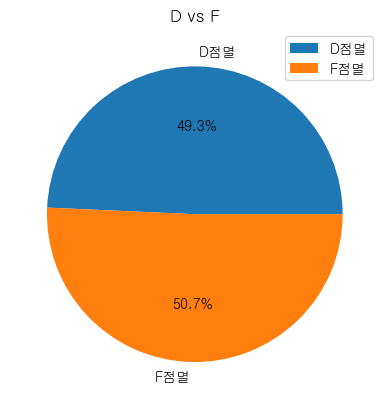

In [570]:
plt.figure()
plt.pie(spell_winrate['승률'],labels = ['D점멸','F점멸'],autopct = '%1.1f%%')
plt.grid(True)
plt.legend(loc=1)
plt.title('D vs F')

In [151]:
top = df[df['teamPosition'] == 'TOP']

In [171]:
top_ban = top.groupby('championId').count()

In [183]:
import requests

In [184]:
url = f'https://ddragon.leagueoflegends.com/cdn/13.24.1/data/ko_KR/champion.json'

In [188]:
res = requests.get(url).json()

In [249]:
data = res['data']

In [332]:
dic = {}

In [333]:
for i in data : 
    dic[data[i]['key']] = data[i]['name']

In [336]:
cp_df = [dic]

In [343]:
new_df = pd.DataFrame(cp_df)

In [346]:
champion_df = new_df.transpose().reset_index()

In [388]:
champion_df.columns = ['championId','championName_kr']

In [389]:
champion_df = champion_df.astype({'championId' :'int'})

In [436]:
df = pd.merge(df,champion_df,on='championId')

In [437]:
df

,gameId,gameDuration,gameVersion,summonerName,summonerLevel,participantId,championName,champExperience,teamPosition,teamId,...,item6,summoner1Id,summoner2Id,turretKills,firstTowerKill,totalMinionsKilled,pentaKills,championId,pickTurn,championName_kr
0,KR_6637806460,954,13.15.524.1760,Chu,72,1,Renekton,6379,TOP,100,...,3340,4,12,1,False,108,0,7,1,르블랑
1,KR_6637806460,954,13.15.524.1760,xiaoQuQ,98,9,Xayah,6131,BOTTOM,200,...,3363,6,4,0,False,133,0,7,9,르블랑
2,KR_6637829106,930,13.15.524.1760,Chu,72,2,Taliyah,7134,JUNGLE,100,...,3513,4,11,0,False,21,0,7,2,르블랑
3,KR_6667283449,1048,13.16.525.6443,합리화 금지,513,10,Sett,7807,TOP,200,...,3340,14,4,0,False,105,0,7,10,르블랑
4,KR_6724635207,2059,13.19.533.1909,어메랄드,214,4,Zeri,16259,BOTTOM,100,...,3363,4,6,1,False,218,0,7,4,르블랑
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10972,KR_6881117633,1557,13.24.547.9214,뽀뽀도한번모태범,814,5,Soraka,7410,UTILITY,100,...,3364,3,4,0,False,14,0,26,5,질리언
10973,KR_6881748316,2079,13.24.547.9214,댕 범,608,6,Gnar,19937,TOP,200,...,3363,12,4,2,False,238,0,96,6,코그모
10974,KR_6883215703,1092,13.24.547.9214,chanda,398,4,Ornn,14000,NaN,200,...,3348,2201,2202,0,False,0,0,96,4,코그모
10975,KR_6882581414,1252,13.24.547.9214,3chris,91,8,Akali,9181,MIDDLE,200,...,3364,4,12,0,False,130,0,21,8,미스 포츈


In [448]:
TOP = df[df['teamPosition']=='TOP']
JUNGLE = df[df['teamPosition']=='JUNGLE']
MIDDLE = df[df['teamPosition']=='MIDDLE']
BOTTOM = df[df['teamPosition']=='BOTTOM']
UTILITY = df[df['teamPosition']=='UTILITY']

In [449]:
TOP = TOP[['gameId','championName','teamPosition','championId','teamId','championName_kr']]
JUNGLE = JUNGLE[['gameId','championName','teamPosition','championId','teamId','championName_kr']]
MIDDLE = MIDDLE[['gameId','championName','teamPosition','championId','teamId','championName_kr']]
BOTTOM = BOTTOM[['gameId','championName','teamPosition','championId','teamId','championName_kr']]
UTILITY = UTILITY[['gameId','championName','teamPosition','championId','teamId','championName_kr']]

In [455]:
TOP_df = TOP.groupby('championName_kr').count().rename(columns={'teamId':'cnt'})
JUNGLE_df = JUNGLE.groupby('championName_kr').count().rename(columns={'teamId':'cnt'})
MIDDLE_df = MIDDLE.groupby('championName_kr').count().rename(columns={'teamId':'cnt'})
BOTTOM_df = BOTTOM.groupby('championName_kr').count().rename(columns={'teamId':'cnt'})
UTILITY_df = UTILITY.groupby('championName_kr').count().rename(columns={'teamId':'cnt'})

In [465]:
TOP = TOP_df[['cnt']].sort_values(by = 'cnt' , ascending = False).reset_index().head(3)
JUNGLE = JUNGLE_df[['cnt']].sort_values(by = 'cnt' , ascending = False).reset_index().head(3)
MIDDLE = MIDDLE_df[['cnt']].sort_values(by = 'cnt' , ascending = False).reset_index().head(3)
BOTTOM = BOTTOM_df[['cnt']].sort_values(by = 'cnt' , ascending = False).reset_index().head(3)
UTILITY = UTILITY_df[['cnt']].sort_values(by = 'cnt' , ascending = False).reset_index().head(3)

In [479]:
UTILITY

,championName_kr,cnt
0,블리츠크랭크,120
1,요네,94
2,잭스,86


In [468]:
import seaborn as sns